# **Examen #2 de Métodos computacionales 13-Feb-2024**

## **Instrucciones Generales:**  
- El examen consta de **3 puntos**, cada uno con el mismo valor.  
- **No está permitido** el uso de herramientas de inteligencia artificial para resolver los ejercicios.  
- Puede consultar únicamente la **documentación oficial, libros de texto, apuntes y recursos autorizados**.  
- Se valorará la **claridad, justificación de los procedimientos y el desarrollo completo** de las respuestas.  

**Tiempo total:** 2 horas

**Nota:** Cualquier indicio de uso de herramientas no permitidas será motivo de anulación del examen.  


**Estudiante: Juan Manuel Patiño daza**

**C.C 1122510764**

# 1.(33%) Péndulo
 I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$

In [73]:
#librerias que vamos a implementar en el codigo, para el ejercicio 1
import numpy as np
import pandas as pd
import scipy.integrate as integrate

la primera integral no sirve porque la integral se cancela los cosenos y me queda un cero abajo, lo cual se soluciona con la integral de abajo

        T/T0  Alfa rad  Alfa Degree
0   1.000000  0.000000          0.0
1   1.000024  0.017453          1.0
2   1.000097  0.034907          2.0
3   1.000218  0.052360          3.0
4   1.000388  0.069813          4.0
..       ...       ...          ...
86  1.209783  1.500983         86.0
87  1.215559  1.518436         87.0
88  1.221450  1.535890         88.0
89  1.227459  1.553343         89.0
90  1.233588  1.570796         90.0

[91 rows x 3 columns]


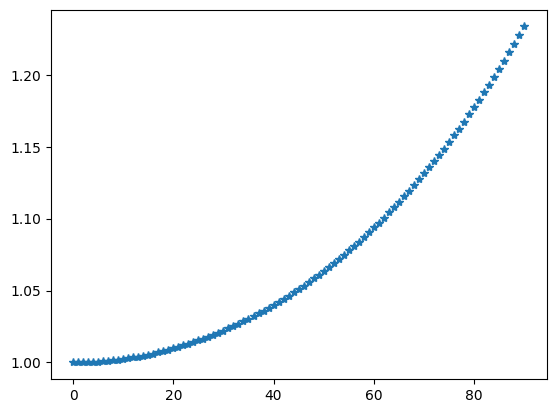

In [74]:
D=[]  #aqui vamos a guardar los datos que se vuelven dataframes
p=[]
A=[]

#T2 = T/T0

for i in range(0,91,1):   #como va a variar alfa entre 0 y 90 lo mas rentable es usar un for para que teta varie en esos valores y
                          #guardarlos en un dataframe

  alfa = np.radians(i)    #lo volvemos a radianes porque np trabaja con radianes

  def Integrate(teta):    #definimos la funcion que vamos a integrar
    return 1/np.sqrt(1-np.sin(alfa/2)**2 * np.sin(teta))

  T2 = (2/np.pi) * integrate.quad(Integrate, 0, np.pi/2)[0]   #integramos usando scipy.integrate el cual nos integra pasando los
                                                              #argumentos y el intervalo
  D.append([T2,alfa,np.degrees(alfa)])    #fuardamos todo
  p.append(T2)
  A.append(np.degrees(alfa))

D=np.array(D)
df2 = pd.DataFrame(D,columns=['T/T0', 'Alfa rad', 'Alfa Degree'])   #usamos pandas para crear el data frame
print(df2)  #imprimimos
plt.plot(A,p,'*')
plt.show()

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






In [75]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
print()
print(data)

    Año  NoSauvizado  Promedio_5
0  1880        -0.17       -0.10
1  1881        -0.09       -0.13
2  1882        -0.11       -0.17
3  1883        -0.17       -0.20
4  1884        -0.28       -0.24

      Año  NoSauvizado  Promedio_5
0    1880        -0.17       -0.10
1    1881        -0.09       -0.13
2    1882        -0.11       -0.17
3    1883        -0.17       -0.20
4    1884        -0.28       -0.24
..    ...          ...         ...
140  2020         1.01        0.97
141  2021         0.84        1.03
142  2022         0.89        1.08
143  2023         1.17        1.14
144  2024         1.28        1.20

[145 rows x 3 columns]


In [76]:
import matplotlib.pyplot as plt

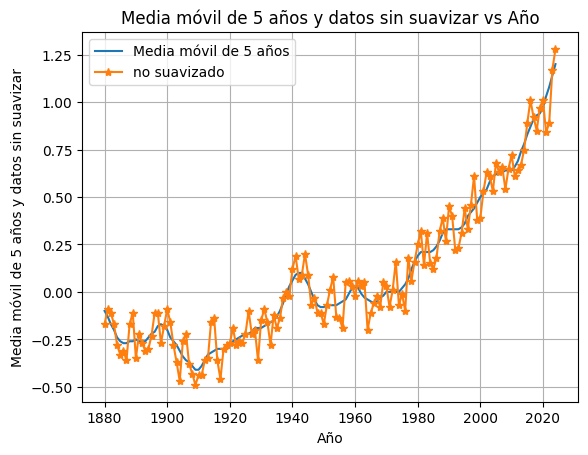

In [77]:
#insiso 1
plt.plot(data['Año'], data['Promedio_5'], label='Media móvil de 5 años') #ploteamos la media movil "promedio 5"
plt.title('Media móvil de 5 años y datos sin suavizar vs Año')
plt.xlabel('Año')
plt.ylabel('Media móvil de 5 años y datos sin suavizar')
plt.legend()

#insiso 2
plt.plot(data['Año'], data['NoSauvizado'], marker='*', label= 'no suavizado') #ploteamos el "no suavizado"
plt.legend()
plt.grid()
plt.show()

**insiso 3:**

apartir de 1950 en promedio la temperatura a aumentado de forma exponencial
es probable que el fin de la segunda gerra mundial y el comienxo de la globalizacion
aumentaran el comercio y el uso comercial de vehiculos y maquinaria que genera gases de efecto invernadero.

In [78]:
data2= data[120:141]    #tomamos los datos de 2000-2020
data3= data2["Año"].values
data4= data2["NoSauvizado"].values

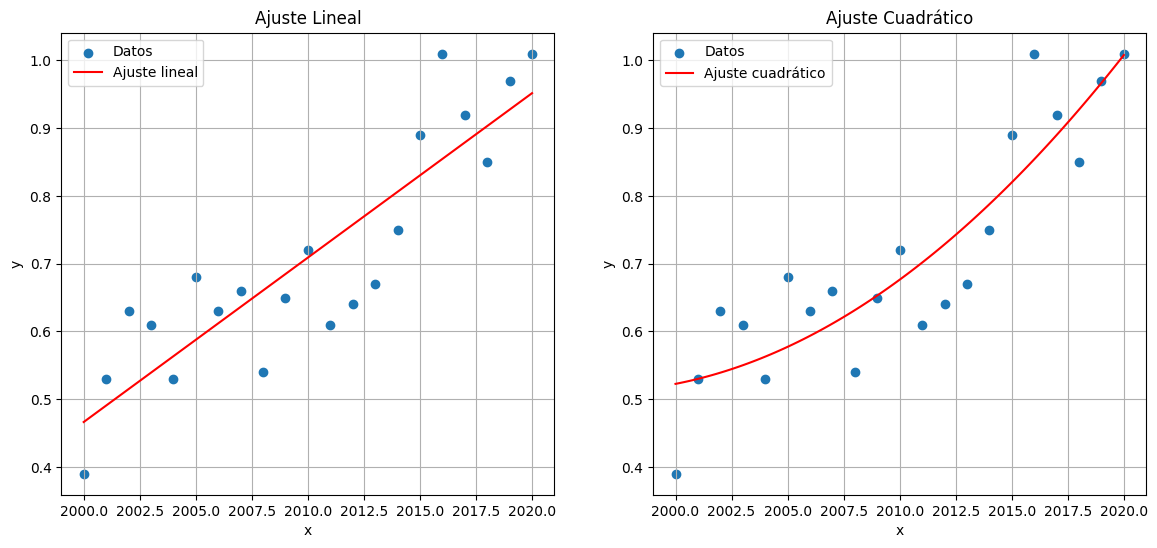

In [79]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#insiso 4

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array(data3) #años
y = np.array(data4) #temperatura no suavizado

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)


# Graficar datos y ajuste
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 2 filas, 1 columna


axes[0].scatter(x, y, label='Datos')
axes[0].plot(x_fit, y_fit, label='Ajuste lineal', color='red')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].set_title('Ajuste Lineal')
axes[0].grid()

'''
los datos con el ajuste lineal no ajusta tan bien entonces se intenta con un
ajuste cuadratico para que quede mejor linealizado
'''

def cuadratica(x, a, b, c):
     return a * x**2 + b * x + c

params, covariance = curve_fit(cuadratica, x, y)
a, b, c = params         #parametros de la funcion cuadratica asociada a nuestros puntos

x_fit = np.linspace(min(x), max(x), 100)  # Generamos puntos para la línea de ajuste
y_fit = cuadratica(x_fit,a,b,c)  # Calculamos los valores de y correspondientes
# Graficar datos y ajuste

axes[1].scatter(x, y, label='Datos')
axes[1].plot(x_fit, y_fit, label='Ajuste cuadrático', color='red')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].set_title('Ajuste Cuadrático')
axes[1].grid()


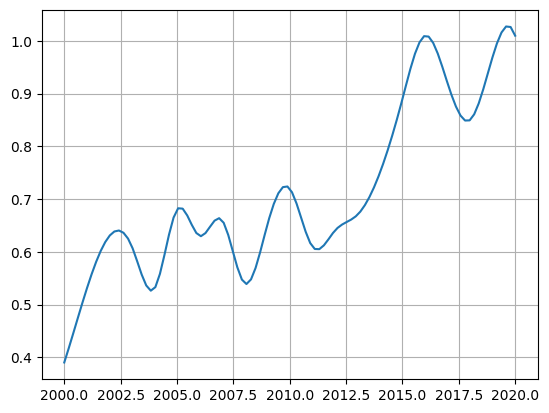

In [80]:
#insiso 5
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

cs = CubicSpline(x,y)
x_=np.linspace(2000,2020,100)
y_=cs(x_)

plt.grid()
plt.plot(x_,y_)

#insiso 6
es preferible un ajuste, da una mejor idea, ademas depende el metodo a interpolar,
en estecaso se realizo una interpolacion lineal aunque se en conciente que la interpolacion
por spines cubicos

#insiso 7
se puede hacer una extrapolacion con los datos completos y poder predecir
el aumento de la temperatura para el 2030

# 3. Derivación numérica

En el siguiente link ([datos_pendulo](https://github.com/hernansalinas/Curso_Metodos_Computacionales/tree/main/Entregas/Parciales/Parcial2/dataset)), se encuentran  datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa [kinovea](https://www.kinovea.org/). Dados los datos en formato csv,  construir un programa que realice lo siguiente:

- a. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

- b. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?

- c. Realice un gráfico de la rapidez angular como funcion del tiempo medio.$\frac{\mathrm{d}\theta}{\mathrm{d}t}$

- d. realice un grafico de la  aceleración angular como funcion del tiempo medio  $\frac{\mathrm{d^2}\theta}{\mathrm{d}t^2}$

Bonus

Calcule la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```python
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

- Encuentre el valor máximo de frecuencia

In [81]:
#insiso A
import pandas as pd

url="http://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/refs/heads/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv"
dataframe = pd.read_csv(url,sep=";",decimal=",")
dataframe.columns = ["Tiempo[ms]","AnguloDeg"]
dataframe['AnguloRad'] = np.radians(dataframe['AnguloDeg'])
dataframe

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.028961,1.030250
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.004925,1.099643
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


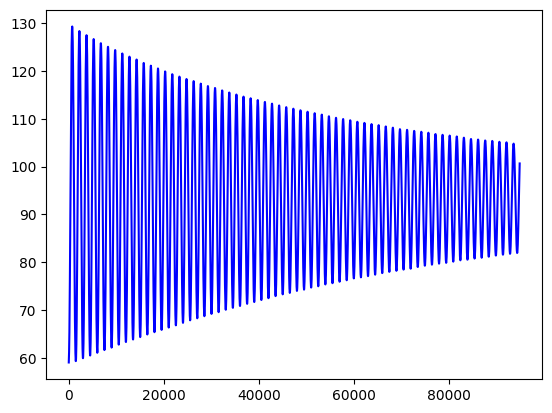

In [82]:
#insiso B
plt.plot(dataframe['Tiempo[ms]'], dataframe['AnguloDeg'],"b-")

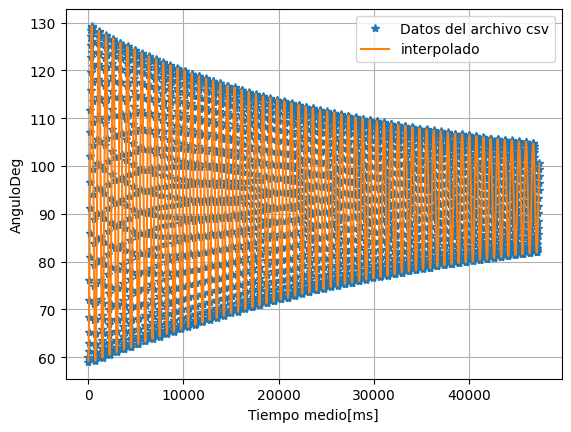

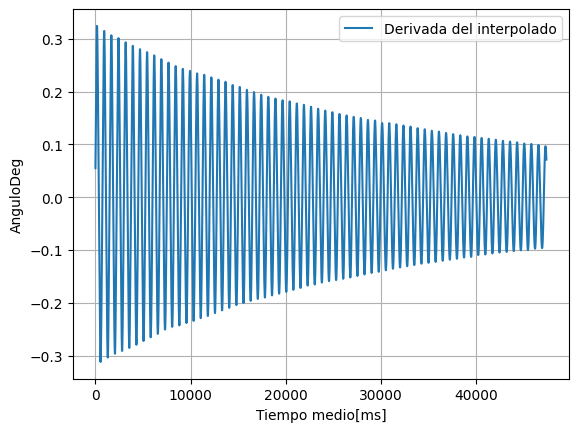

In [89]:
#insiso C
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

tmedio=np.zeros(len(dataframe['Tiempo[ms]']))  #creamos un array de ceros donde vamos a guardar los
                                               #tiempos del tiempo medio

for i in range(1,len(dataframe['Tiempo[ms]'].values)):
  tmedio[i]=np.mean(dataframe['Tiempo[ms]'][0:i])

x = tmedio  #colocamos t medio como x para realizar las graficas
y = dataframe['AnguloDeg'].values

interpolado = UnivariateSpline(x, y, s=2)  #interpolamos para crear una funcion apartir de los puntos del archivo csv

derivada = interpolado.derivative() #apartir de la funcion que interpolamos calculamos la derivada

y_derivada = derivada(x)  # Evaluar la derivada en los puntos x

# Graficamos los resultados
plt.plot(x, y,"*", label='Datos del archivo csv')
plt.plot(x, interpolado(x), label='interpolado')
plt.xlabel('Tiempo medio[ms]')
plt.ylabel('AnguloDeg')
plt.legend()
plt.grid()
plt.show()

plt.plot(x, y_derivada, label='Derivada del interpolado')
plt.xlabel('Tiempo medio[ms]')
plt.ylabel('AnguloDeg')
plt.legend()
plt.grid()
plt.show()
#la escala de la derivada es muchoo menor que la escala de los datos por lo cual
#se grafica aparte

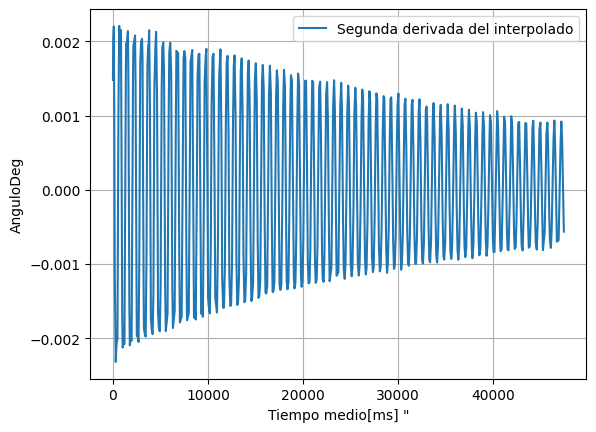

In [87]:
#inciso D
derivada2 = interpolado.derivative(n=2)  #calculamos la segunda derivada

y_derivada2 = derivada2(x)  # Evaluar la derivada en los puntos x

# Graficamos los resultados
plt.plot(x, y_derivada2, label='Segunda derivada del interpolado')
plt.xlabel('Tiempo medio[ms] "')
plt.ylabel('AnguloDeg')
plt.legend()
plt.grid()
plt.show()